In [33]:
%matplotlib inline
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

In [34]:
from math import exp
# define a gaussian kernel function
def GaussianKernel(v1, v2, sigma):
    return exp(-norm(v1-v2, 2)**2/(2.*sigma**2))

# this is a simple kernel function
def simpleKernel(n1,n2,sigma):
    difference = float(n1) - float(n2)
    difference = pow(difference,2)
    difference = (-1.0*difference)/ (sigma**2)
    return exp(difference)

In [19]:
# implement simple mean shift
import numpy as np
# random pick a point
from random import randrange

# Generate dataset
# keep the dataset the same
mu, sigma = 10, 3 # mean and standard deviation
dataset = np.random.normal(mu, sigma, 1000)
mu, sigma = 20, 3 # mean and standard deviation
dataset = np.array(list(dataset) + list(np.random.normal(mu,sigma,1000)))
print "data set done"

data set done


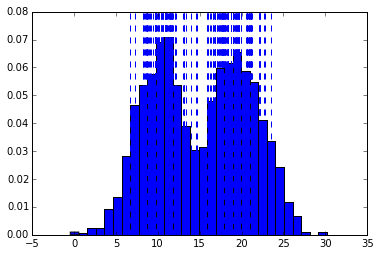

In [44]:
# graph the previous dataset
import matplotlib.pyplot as plt
#do not sort the data here
#s.sort()
count, bins, ignored = plt.hist(dataset, 30, normed=True)
for result in result_list:
    plt.axvline(result, color='b', linestyle='dashed', linewidth=1)
#plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

In [36]:
from scipy.spatial import distance

# this function is to calculate the k nearest neighbor
def K_Nearest_Neighbor(current, k, data):
    return_list = []
    index = 0
    distanceList = []
    for x in data:
        distanceList.append((distance.euclidean(current, x), x))
    distanceList.sort()
    #get the k nearest label
    for i in range (0, k):
        #append the first k smallest element
        return_list.append(distanceList[i][1])
    return return_list

final estimate is  9.68427564715
final estimate is  10.9203277469
final estimate is  16.8236648097
final estimate is  8.64409905981
final estimate is  10.999797998
final estimate is  17.6943058776
final estimate is  11.0492493594
final estimate is  18.3100939019
final estimate is  10.9203277469
final estimate is  8.26421532102
final estimate is  11.333411094
final estimate is  8.30583180461
final estimate is  11.6661637661
final estimate is  8.26421532102
final estimate is  18.3291111258
final estimate is  9.65832637781
final estimate is  21.0447720586
final estimate is  11.6661637661
final estimate is  9.86865041475
final estimate is  18.036460838
final estimate is  10.6552416049
final estimate is  21.1664949696
final estimate is  18.729666234
final estimate is  18.252530721
final estimate is  16.2681626641
final estimate is  19.9721840114
final estimate is  12.0159047972
final estimate is  14.6116010112
final estimate is  10.6592778691
final estimate is  16.5735180041
final estimate 

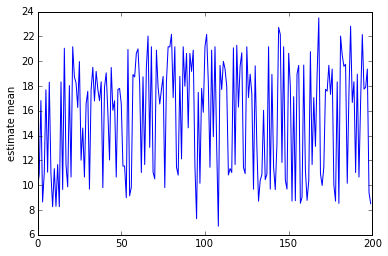

In [43]:
import copy
def distance_calculate(estimate, current):
    return (abs(estimate-current),current)

window_size = 10
result_list = []
# run experiments
for experiment in range(0, 200):
    np.random.shuffle(dataset)
    estimate = dataset[0]
    #print "estimate is ", estimate
    window = []
    for i in range(1, 11):
        window.append(distance_calculate(estimate, dataset[i]))
    window.sort()

    #print "new estimate is ", sum(n for _, n in window) / len(window)
    #for i in range(10, len(dataset)):
    for i in range(11, len(dataset)):
        current = dataset[i]
        current_distance = distance_calculate(estimate, current)
        #if the distance is samller than the window's last element, update the window
        if current_distance[0] < window[len(window)-1][0]:
            # remove the last element
            window.pop()
            window.append(current_distance)
        estimate = sum(n for _, n in window) / len(window)
        # print "new estimate is ", estimate
        window_copy = copy.deepcopy(window)
        window = []
        for i in range(0, 10):
            window.append(distance_calculate(estimate, window_copy[i][1]))
        window.sort()
    print "final estimate is ", estimate
    result_list.append(estimate)
    #print "final window is ", window

In [52]:
from sklearn.cluster import KMeans
import numpy as np
km = KMeans(n_clusters=2)
#change result list to column major
result_list = np.array(result_list)
km.fit(result_list.reshape(-1,1))  # -1 will be calculated to be 13876 here
print km.cluster_centers_

[[ 0.05481251]
 [ 0.59849769]
 [ 0.68600935]
 ..., 
 [ 0.77140677]
 [ 0.20525936]
 [ 0.06343317]]
[[ 19.08037224]
 [ 10.59120416]]
